use K-means clustering 
* to cluster New York into differenct group based on location
* analyze traffic into and out of every cluster as a function of the time along day

In [ ]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.11).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


#import library

In [ ]:
import os
import pandas as pd
import numpy as np

from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm


from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from dateutil import parser

import io
import base64
from IPython.display import HTML
from imblearn.under_sampling import RandomUnderSampler
from subprocess import check_output

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df=pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# **Remove ride to and from far away area**

In [ ]:
xlim=[-74.03,-73.77]
ylim=[40.63,40.85]
df=df[(df.pickup_longitude>xlim[0])&(df.pickup_longitude<xlim[1])]
df=df[(df.dropoff_longitude>xlim[0])&(df.dropoff_longitude<xlim[1])]

df=df[(df.pickup_latitude>ylim[0])&(df.pickup_latitude<ylim[1])]
df=df[(df.dropoff_latitude>ylim[0])&(df.dropoff_latitude<ylim[1])]

## **Plot rides**

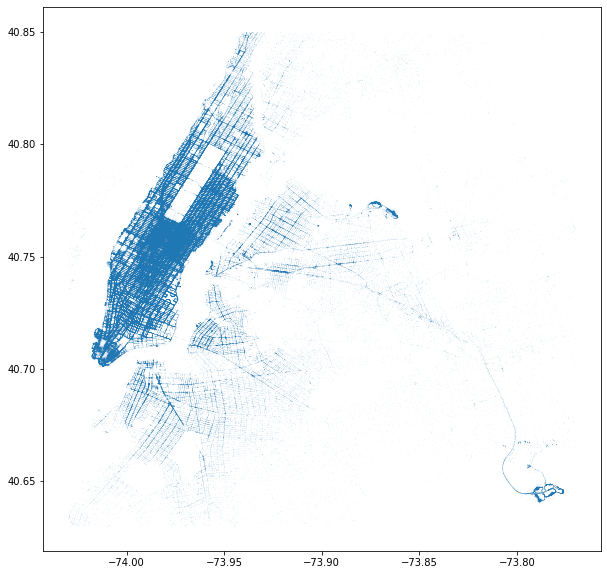

In [ ]:
longitude=list(df.pickup_longitude)+list(df.dropoff_longitude)
latitude=list(df.pickup_latitude)+list(df.dropoff_latitude)
plt.figure(figsize=(10,10))
plt.plot(longitude,latitude,".",alpha=0.4,markersize=0.05)
plt.show()

In [ ]:
loc_df = pd.DataFrame()
loc_df['longitude'] = longitude
loc_df['latitude'] = latitude

# **Cluster**<br>
cluster New York city based on pick-up and drop-off point of each taci ride

NY is divided into different neighborhoods<br>
* upper east - gray <br>
* west side of central park - pink <br>
* west midtown - blue<br>
* chelsea and west village - brown<br>
* downtown area - blue<br>
* East Village and SoHo - purple

have own cluster<br>
- airport JFK and La Laguardian 
- Queens harlem

divided into 2 cluster
- Brooklyn<br>

Bronx has too few rides to separated from Harlem

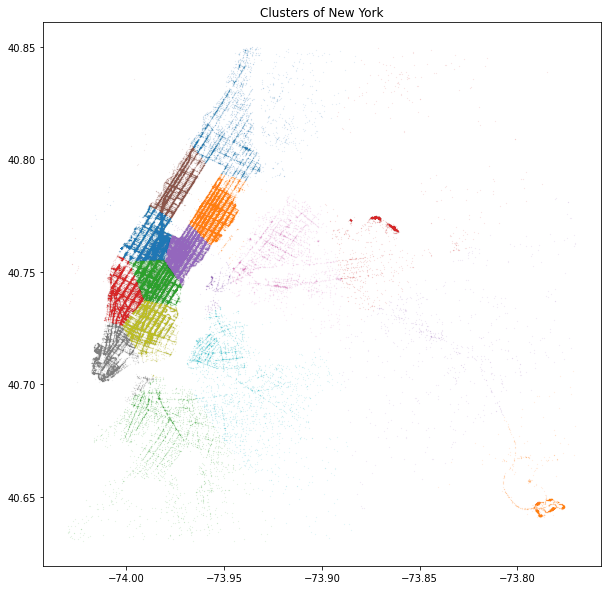

In [ ]:
kmeans = KMeans(n_clusters=15, random_state=2, n_init = 10).fit(loc_df)
loc_df['label'] = kmeans.labels_

loc_df = loc_df.sample(200000)
plt.figure(figsize = (10,10))
for label in loc_df.label.unique():
    plt.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 0.3, markersize = 0.3)

plt.title('Clusters of New York')
plt.show()

## **plot cluster center**

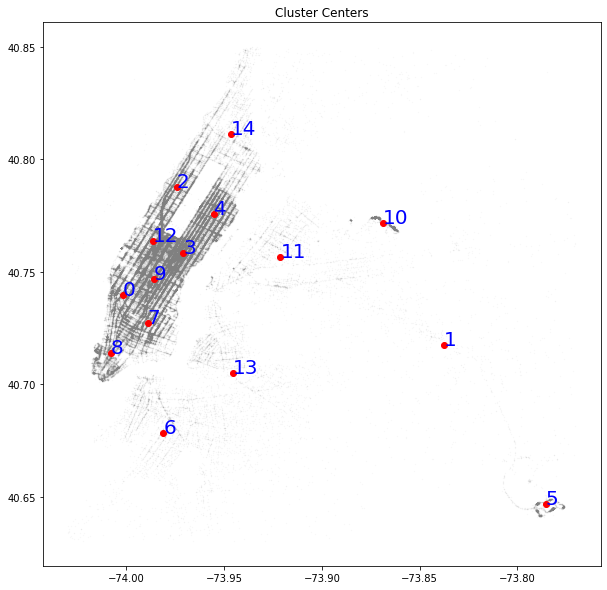

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
for label in loc_df.label.unique():
  ax.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 0.4, markersize = 0.1, color = 'gray')
  ax.plot(kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1],'o', color = 'r')
  ax.annotate(label, (kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1]), color = 'b', fontsize = 20)
ax.set_title("Cluster Centers")
plt.show()


In [ ]:
df["pickup_cluster"]=kmeans.predict(df[["pickup_longitude","pickup_latitude"]])
df["dropoff_cluster"]=kmeans.predict(df[["dropoff_longitude","dropoff_latitude"]])
df["pickup_hour"]=df.pickup_datetime.apply(lambda x:parser.parse(x).hour)

In [ ]:
clusters=pd.DataFrame()
clusters["x"]=kmeans.cluster_centers_[:,0]
clusters["y"]=kmeans.cluster_centers_[:,1]
clusters["label"]=range(len(clusters))

In [ ]:
loc_df=loc_df.sample(5000)

## **taxi ride from one cluster to another**<br>
every arrow represent rides from one cluster to another<br>
width of arrow is proportional to relative amount of trips in relevant hour

* share taxi travelling to Brooklyn area, mostly in williamsburg : larger in late even
* no similar movement in morning hours : unlikely to be result of commuting
* traffic is mostly seen after 22:00 : people going out
<br>

arrow represent relative traffic in relevant hour
* increasing width of arrow leading to Brooklyn <br>
 원인 : a result of reduction in rides in Manhattan, due to commercial character<br>

At absolute traffic
* arrow from Manhattan to Brooklyn are barely seen for the most part of day

In early morning
* most traffic : from/to airport

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning


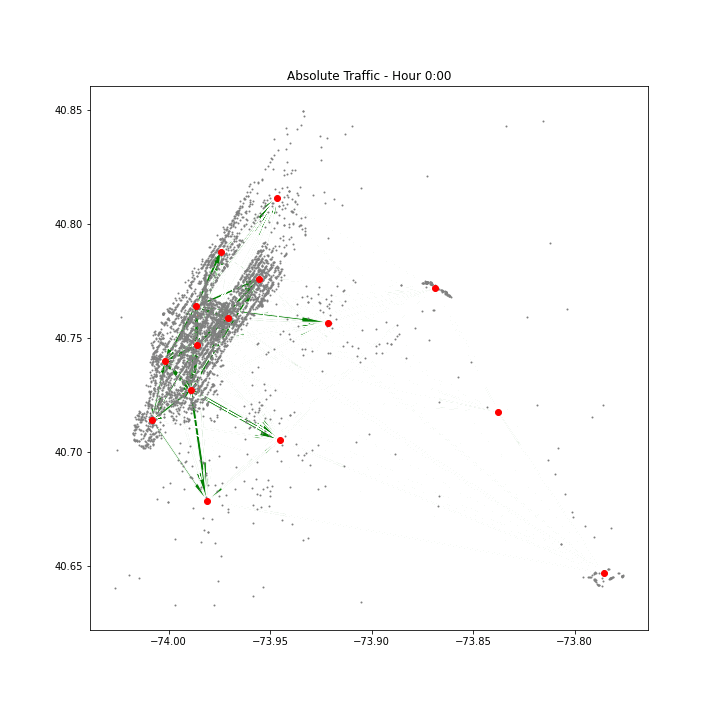

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10,10))

def animate(hour):
    ax.clear()
    ax.set_title('Absolute Traffic - Hour ' + str(int(hour)) + ':00')    
    plt.figure(figsize = (10,10));
    for label in loc_df.label.unique():
        ax.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 1, markersize = 2, color = 'gray');
        ax.plot(kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1],'o', color = 'r');


    for label in clusters.label:
        for dest_label in clusters.label:
            num_of_rides = len(df[(df.pickup_cluster == label) & (df.dropoff_cluster == dest_label) & (df.pickup_hour == hour)])
            dist_x = clusters.x[clusters.label == label].values[0] - clusters.x[clusters.label == dest_label].values[0]
            dist_y = clusters.y[clusters.label == label].values[0] - clusters.y[clusters.label == dest_label].values[0]
            pct = np.true_divide(num_of_rides,len(df))
            arr = Arrow(clusters.x[clusters.label == label].values, clusters.y[clusters.label == label].values, -dist_x, -dist_y, edgecolor='white', width = 15*pct)
            ax.add_patch(arr)
            arr.set_facecolor('g')


ani = animation.FuncAnimation(fig,animate,sorted(df.pickup_hour.unique()), interval = 1000)
plt.close()
ani.save("animation.gif",  writer="imagemagick",fps=2)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning


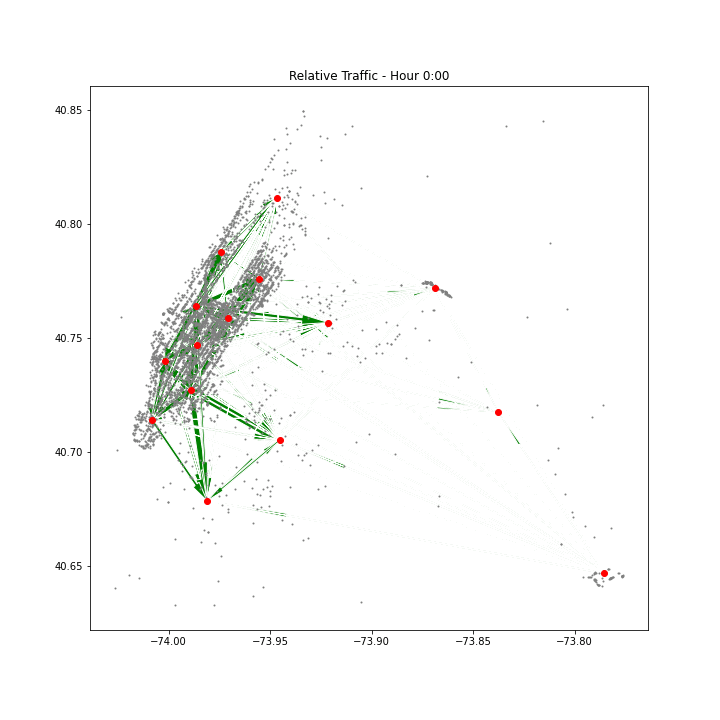

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10,10))

def animate(hour):
    ax.clear()
    ax.set_title('Relative Traffic - Hour ' + str(int(hour)) + ':00')    
    plt.figure(figsize = (10,10))
    for label in loc_df.label.unique():
        ax.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 1, markersize = 2, color = 'gray')
        ax.plot(kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1],'o', color = 'r')


    for label in clusters.label:
        for dest_label in clusters.label:
            num_of_rides = len(df[(df.pickup_cluster == label) & (df.dropoff_cluster == dest_label) & (df.pickup_hour == hour)])
            dist_x = clusters.x[clusters.label == label].values[0] - clusters.x[clusters.label == dest_label].values[0]
            dist_y = clusters.y[clusters.label == label].values[0] - clusters.y[clusters.label == dest_label].values[0]
            pct = np.true_divide(num_of_rides,len(df[df.pickup_hour == hour]))
            arr = Arrow(clusters.x[clusters.label == label].values, clusters.y[clusters.label == label].values, -dist_x, -dist_y, edgecolor='white', width = pct)
            ax.add_patch(arr)
            arr.set_facecolor('g')


ani = animation.FuncAnimation(fig,animate,sorted(df.pickup_hour.unique()), interval = 1000)
plt.close()
ani.save('animation.gif', writer='imagemagick', fps=2)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

# **Neighborhood Analysis**


assign neighborhood name to each cluster

In [ ]:
neighborhood = {-74.0019368351: 'Chelsea',-73.837549761: 'Queens',-73.7854240738: 'JFK',-73.9810421975:'Midtown-North-West',-73.9862336241: 'East Village',
                -73.971273324:'Midtown-North-East',-73.9866739677: 'Brooklyn-parkslope',-73.8690098118: 'LaGuardia',-73.9890572967:'Midtown',-74.0081765545: 'Downtown'
                ,-73.9213024854: 'Queens-Astoria',-73.9470256923: 'Harlem',-73.9555565018: 'Uppe East Side',
               -73.9453487097: 'Brooklyn-Williamsburgt',-73.9745967889:'Upper West Side'}

In [ ]:
rides_df = pd.DataFrame(columns = neighborhood.values())
rides_df['name'] = neighborhood.values()

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(np.array(list(neighborhood.keys())).reshape(-1, 1), list(neighborhood.values()))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
df['pickup_neighborhood'] = neigh.predict(df.pickup_longitude.values.reshape(-1,1))
df['dropoff_neighborhood'] = neigh.predict(df.dropoff_longitude.values.reshape(-1,1))

for col in rides_df.columns[:-1]:
    rides_df[col] = rides_df.name.apply(lambda x: len(df[(df.pickup_neighborhood == x) & (df.dropoff_neighborhood == col)]))

plot heatmap and look where do passengers go to and from 

* center Manhattan neighborhood : most taxi crowded
* symmetrical heatmap : cluster not have more pickups than dropoff or other way around

In [ ]:
trace = go.Heatmap(z= np.array(rides_df.values),
                  x = rides_df.columns[:-1],
                  y = rides_df.columns)
layout = dict(
    title = ' <b>Neighborhoods Interaction</b>',
    titlefont = dict(
    size = 30,
    color = ('rgb(100,100,100)')),
    margin = dict(t=100,r=100,b=100,l=150),
        yaxis = dict(
            title = ' <b> From </b>'),
        xaxis = dict(
            title = '<b> To </b>'))
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')


Text(0.5, 1.35, 'Neighborhoods Interaction')

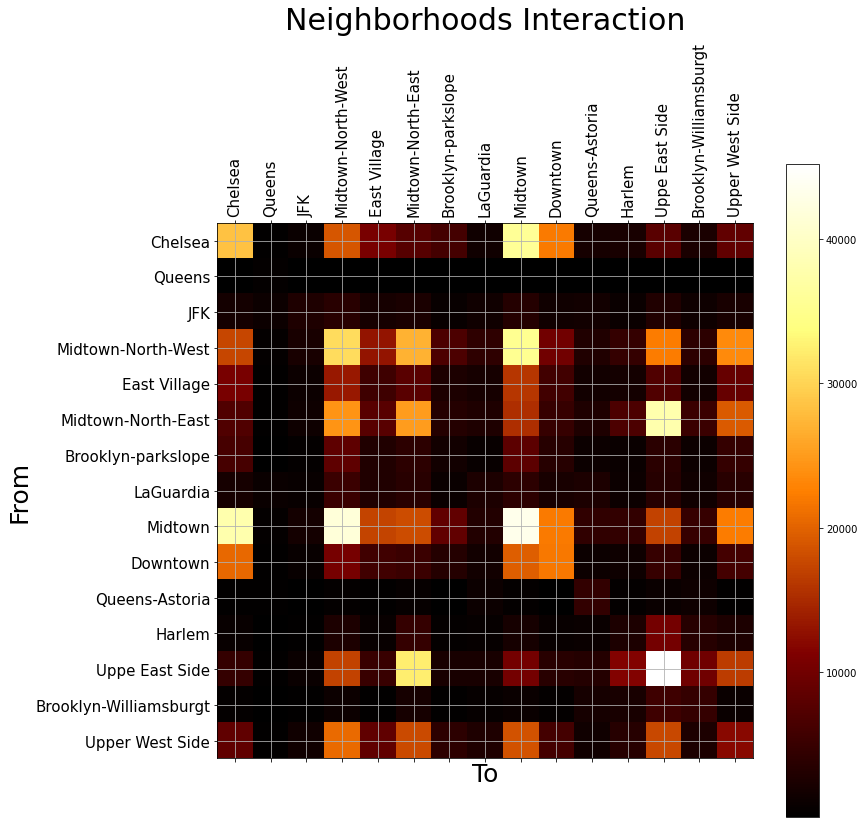

In [ ]:
fig,ax = plt.subplots(figsize = (12,12))
cax = ax.matshow(rides_df.drop('name',axis = 1),interpolation='nearest',cmap=cm.afmhot)
cbar = fig.colorbar(cax)
ax.grid('off')
ax.set_xticks(range(len(rides_df)))
ax.set_xticklabels(rides_df.name, rotation =90,fontsize = 15)
ax.set_yticks(range(len(rides_df)))
ax.set_yticklabels(rides_df.name,fontsize = 15)
ax.set_xlabel('To', fontsize = 25)
ax.set_ylabel('From', fontsize = 25)
ax.set_title('Neighborhoods Interaction', y=1.35, fontsize = 30)

In [ ]:
rides_df.index=rides_df.name
rides_df=rides_df.drop("name",axis=1)

* inbound-outbound ratio : relative balanced
* airport : more outbound than inbound 
원인 : driver would go to airport even without passenger to have chance to take people into city
* residential area : Quuens, Brooklyn and Harlem : more inbound ride
* commercial area : more outbound area
* both residential and commercial are : Upper East and West : almost on curve
* seem to be go into Manhattan by alternative means of transport but more likely to get out by cab

Text(0.5, 1.0, 'Inbound and Outbound rides for each cluster')

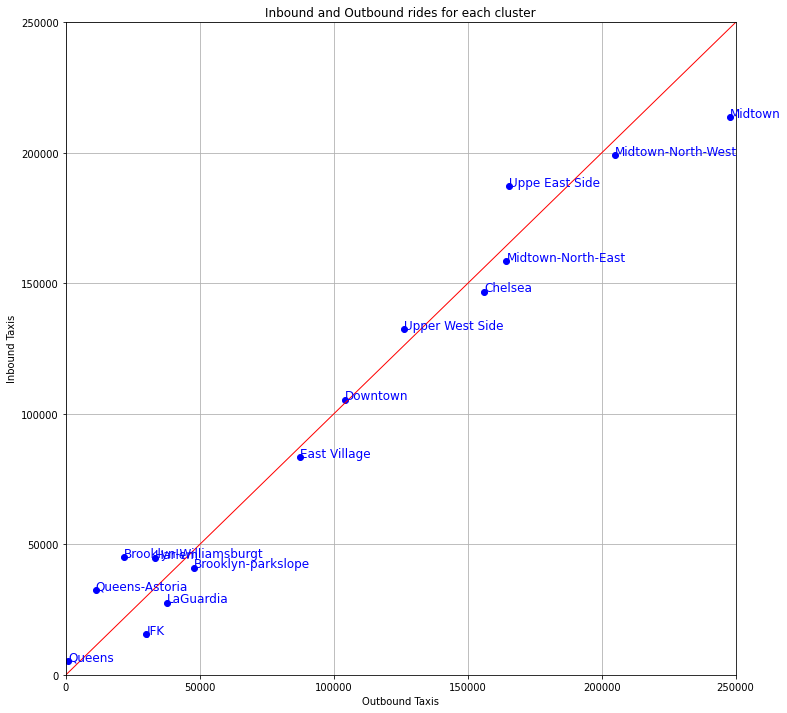

In [ ]:
fig,ax = plt.subplots(figsize = (12,12))
for i in range(len(rides_df)):  
    ax.plot(rides_df.sum(axis = 1)[i],rides_df.sum(axis = 0)[i],'o', color = 'b')
    ax.annotate(rides_df.index.tolist()[i], (rides_df.sum(axis = 1)[i],rides_df.sum(axis = 0)[i]), color = 'b', fontsize = 12)

ax.plot([0,250000],[0,250000], color = 'r', linewidth = 1)
ax.grid('off')
ax.set_xlim([0,250000])
ax.set_ylim([0,250000])
ax.set_xlabel('Outbound Taxis')
ax.set_ylabel('Inbound Taxis')
ax.set_title('Inbound and Outbound rides for each cluster')

# Winter vs Summer

* almost identical regardless of the month
* snowy January vs humid/touristic June : similar Taxi patterns

In [ ]:
df['pickup_month'] = df.pickup_datetime.apply(lambda x: parser.parse(x).month )

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_cluster', 'dropoff_cluster', 'pickup_hour',
       'pickup_neighborhood', 'dropoff_neighborhood', 'pickup_month'],
      dtype='object')

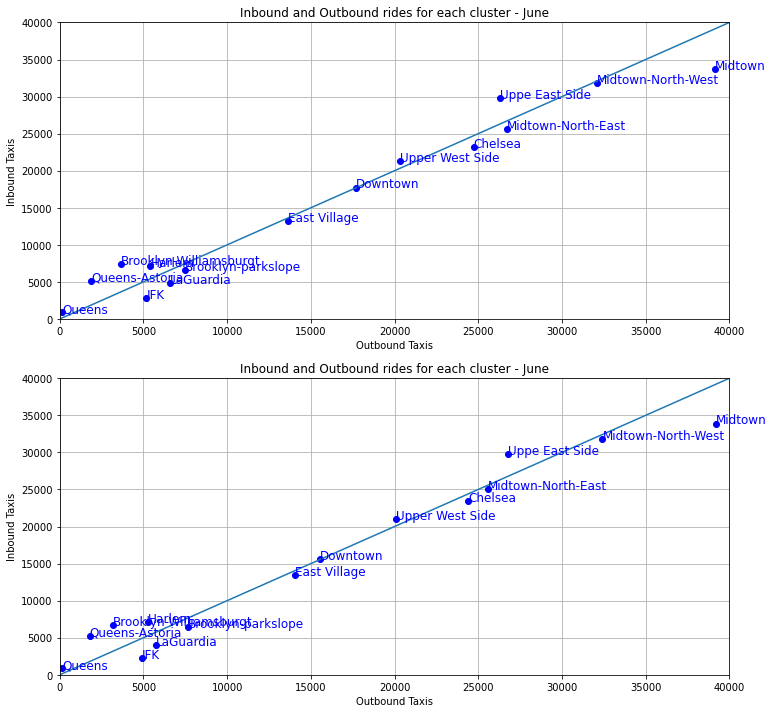

In [ ]:
fig,ax=plt.subplots(2,figsize=(12,12))

rides_df=pd.DataFrame(columns=neighborhood.values())
rides_df["name"]=neighborhood.values()
rides_df.index=rides_df.name

for col in rides_df.columns[:-1]:
  rides_df[col]=rides_df.name.apply(lambda x : len(df[(df.pickup_neighborhood==x)&(df.dropoff_neighborhood==col)&(df.pickup_month==6)]))

for i in range(len(rides_df)):
  ax[0].plot(rides_df.sum(axis=1)[i],rides_df.sum(axis=0)[i],"o",color="b")
  ax[0].annotate(rides_df.index.tolist()[i],(rides_df.sum(axis=1)[i],rides_df.sum(axis=0)[i]),color="b",fontsize=12)


ax[0].grid("off")
ax[0].set_xlabel("Outbound Taxis")
ax[0].set_ylabel("Inbound Taxis")
ax[0].set_title('Inbound and Outbound rides for each cluster - June')
ax[0].set_xlim([0,40000])
ax[0].set_ylim([0,40000])
ax[0].plot([0,40000],[0,40000])


for col in rides_df.columns[:-1]:
  rides_df[col]=rides_df.name.apply(lambda x : len(df[(df.pickup_neighborhood==x)&(df.dropoff_neighborhood==col)&(df.pickup_month==1)]))

for i in range(len(rides_df)):
  ax[1].plot(rides_df.sum(axis=1)[i],rides_df.sum(axis=0)[i],"o",color="b")
  ax[1].annotate(rides_df.index.tolist()[i],(rides_df.sum(axis=1)[i],rides_df.sum(axis=0)[i]),color="b",fontsize=12)


ax[1].grid("off")
ax[1].set_xlabel("Outbound Taxis")
ax[1].set_ylabel("Inbound Taxis")
ax[1].set_title('Inbound and Outbound rides for each cluster - June')
ax[1].set_xlim([0,40000])
ax[1].set_ylim([0,40000])
ax[1].plot([0,40000],[0,40000])
